<a href="https://colab.research.google.com/github/rohinishinde1009/rohini/blob/main/Rohini_shinde_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
print("Customers Data:")
print(customers.info(), customers.head())

print("\nProducts Data:")
print(products.info(), products.head())

print("\nTransactions Data:")
print(transactions.info(), transactions.head())

print("\nMissing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())

print("\nDuplicate rows:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())

Customers Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    10

Step 2: Exploratory Analysis

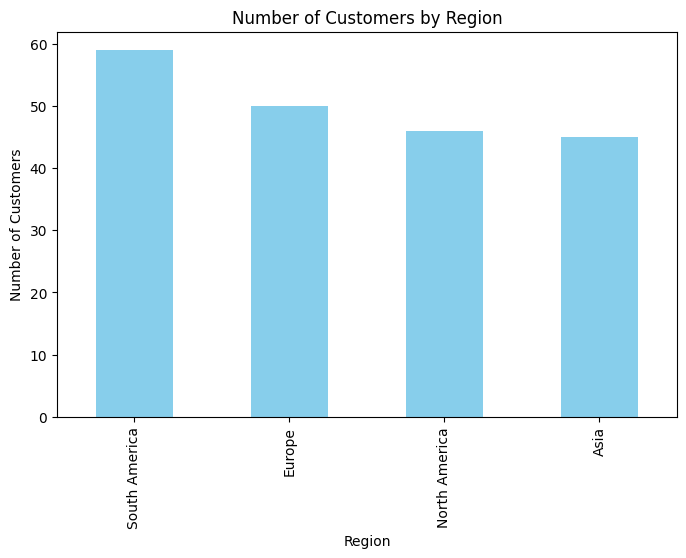

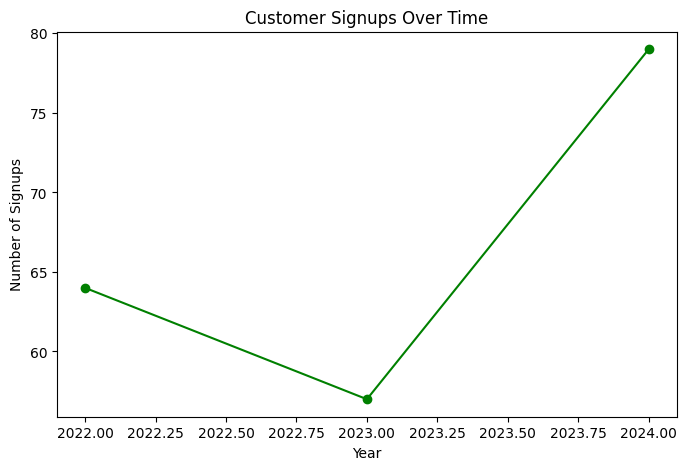

In [4]:
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
region_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()
plt.figure(figsize=(8, 5))
signup_trends.plot(kind='line', marker='o', color='green')
plt.title('Customer Signups Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()


Products Dataset

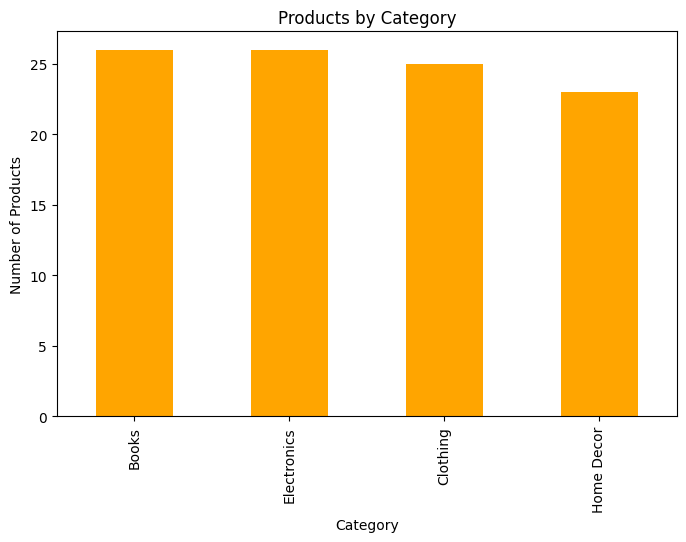

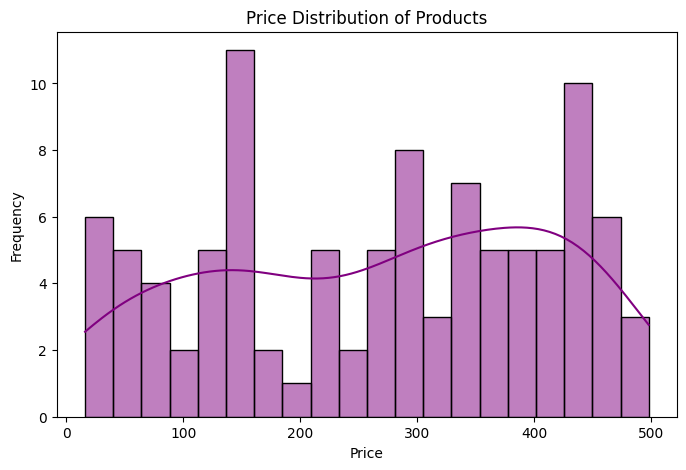

In [5]:
category_counts = products['Category'].value_counts()
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color='orange')
plt.title('Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()
plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], kde=True, color='purple', bins=20)
plt.title('Price Distribution of Products')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Transactions Dataset

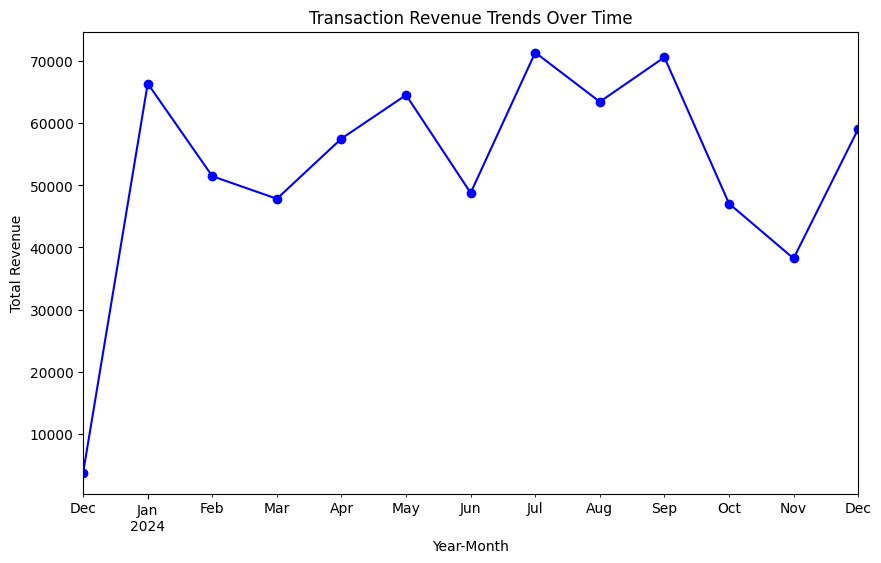

<ipython-input-6-b4c2bedcb862>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='ProductName', y='Quantity', palette='viridis')


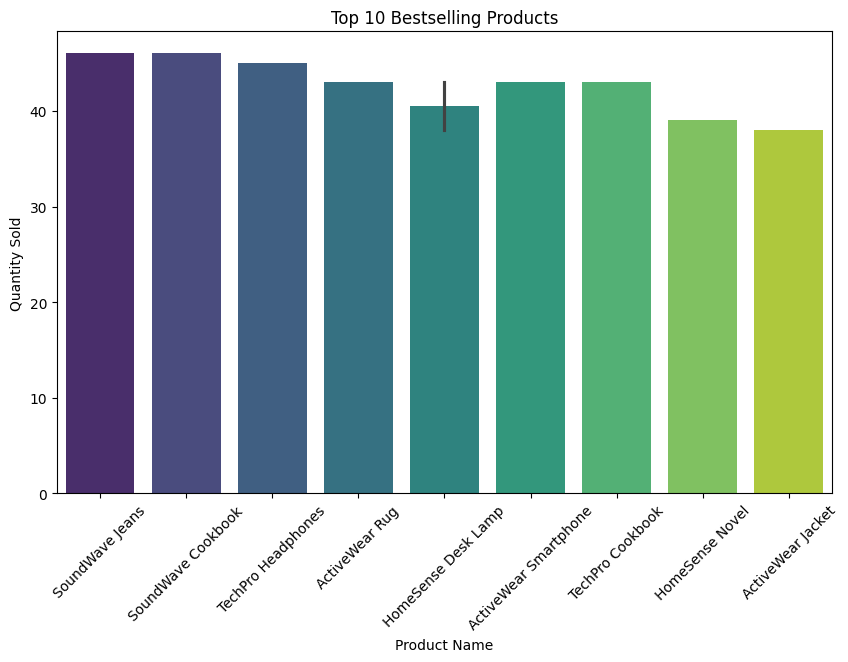

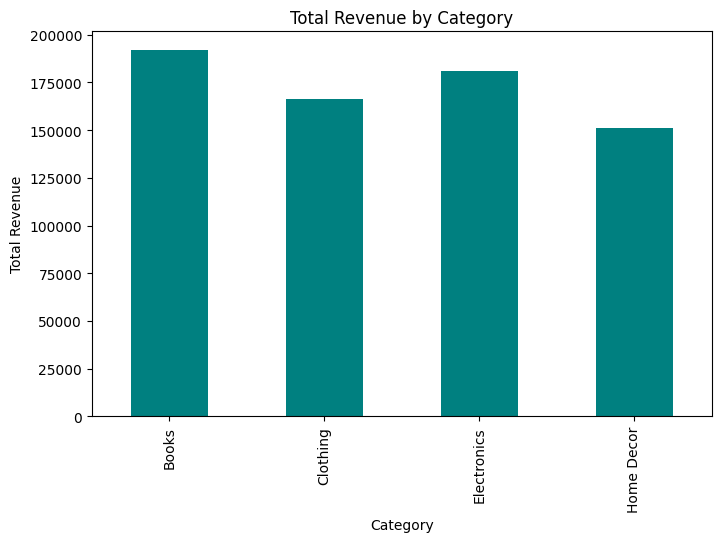

In [6]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
transaction_trends = transactions.groupby('YearMonth')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
transaction_trends.plot(kind='line', marker='o', color='blue')
plt.title('Transaction Revenue Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.show()
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index().merge(products, on='ProductID')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='ProductName', y='Quantity', palette='viridis')
plt.title('Top 10 Bestselling Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

revenue_by_category = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum()
plt.figure(figsize=(8, 5))
revenue_by_category.plot(kind='bar', color='teal')
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()
